In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('../data/page-blocks0.dat')

In [3]:
df.columns

Index(['Height', ' Lenght', ' Area', ' Eccen', ' P_black', ' P_and',
       ' Mean_tr', ' Blackpix', ' Blackand', ' Wb_trans', 'Outcome'],
      dtype='object')

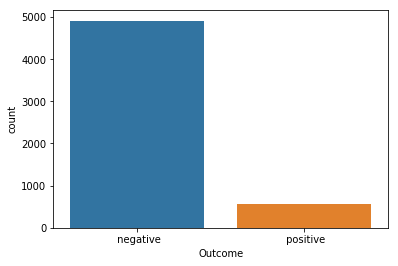

In [4]:
%matplotlib inline
sns.countplot(x='Outcome',data=df)

In [5]:
df_min=df[df['Outcome']==' positive']

In [6]:
df_majority=df[df['Outcome']==' negative']

In [7]:
df_min.to_csv('page-blocks0_minority.csv',index=False)
df_majority.to_csv('page-blocks0_majority.csv',index=False)

In [8]:
data=np.array(df.values)

pos=data.shape[1]-1

for i in range(data.shape[0]):
    if data[i][pos]==' negative':
        data[i][pos]=0
    else:
        data[i][pos]=1


min_data=np.array(df_min)
maj_data=np.array(df_majority)

In [9]:
validation=0.30
seed=0

In [10]:
data.shape

(5472, 11)

In [11]:
df_min.shape

(559, 11)

In [12]:
min_data.shape

(559, 11)

In [13]:
maj_data.shape

(4913, 11)

In [19]:
data[:1,:10]

array([[5, 7, 35.0, 1.4, 0.4, 0.657, 2.33, 14, 23, 6]], dtype=object)

In [20]:
X=data[:,:10].astype(float)# getting the feature values
Y=data[:,10]# getting prediction

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=validation,random_state=seed)

In [22]:
X_train.shape

(3830, 10)

In [23]:
Y_train=Y_train.reshape((Y_train.shape[0],1))

In [24]:
Y_train.shape

(3830, 1)

In [25]:
train_Data=np.concatenate((X_train,Y_train),axis=1)

In [26]:
train_Data[:10]

array([[9.0, 168.0, 1512.0, 18.667, 0.268, 0.6609999999999999, 1.89,
        405.0, 1000.0, 214.0, 0],
       [10.0, 19.0, 190.0, 1.9, 0.568, 0.774, 9.82, 108.0, 147.0, 11.0,
        0],
       [6.0, 13.0, 78.0, 2.167, 0.231, 0.48700000000000004, 3.0, 18.0,
        38.0, 6.0, 0],
       [9.0, 47.0, 423.0, 5.222, 0.336, 0.8909999999999999, 1.78, 142.0,
        377.0, 80.0, 0],
       [8.0, 76.0, 608.0, 9.5, 0.38799999999999996, 0.903, 2.11, 236.0,
        549.0, 112.0, 0],
       [10.0, 40.0, 400.0, 4.0, 0.278, 0.615, 2.09, 111.0, 246.0, 53.0,
        0],
       [9.0, 510.0, 4590.0, 56.667, 0.075, 0.28800000000000003, 1.44,
        346.0, 1323.0, 241.0, 0],
       [12.0, 8.0, 96.0, 0.667, 0.615, 0.9690000000000001, 5.9, 59.0,
        93.0, 10.0, 0],
       [8.0, 22.0, 176.0, 2.75, 0.324, 0.909, 1.78, 57.0, 160.0, 32.0, 0],
       [11.0, 436.0, 4796.0, 39.635999999999996, 0.336, 0.755, 2.86,
        1612.0, 3623.0, 564.0, 0]], dtype=object)

In [27]:
Y_test=Y_test.reshape((Y_test.shape[0],1))

In [28]:
test_Data=np.concatenate((X_test,Y_test),axis=1)

In [29]:
train_Data=DataFrame(train_Data)
test_Data=DataFrame(test_Data)

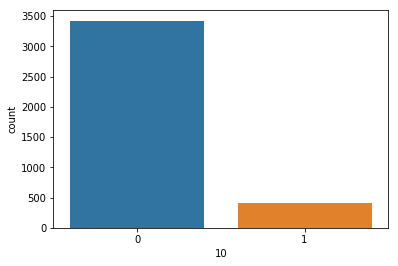

In [31]:
%matplotlib inline
sns.countplot(x=10,data=train_Data)

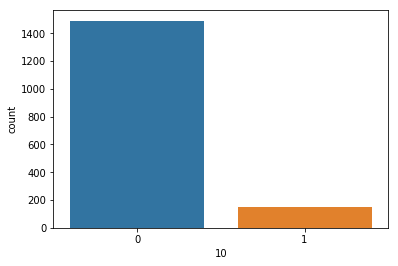

In [32]:
%matplotlib inline
sns.countplot(x=10,data=test_Data)

In [33]:
train_Data

,0,1,2,3,4,5,6,7,8,9,10
0,9,168,1512,18.667,0.268,0.661,1.89,405,1000,214,0
1,10,19,190,1.9,0.568,0.774,9.82,108,147,11,0
2,6,13,78,2.167,0.231,0.487,3,18,38,6,0
3,9,47,423,5.222,0.336,0.891,1.78,142,377,80,0
4,8,76,608,9.5,0.388,0.903,2.11,236,549,112,0
5,10,40,400,4,0.278,0.615,2.09,111,246,53,0
6,9,510,4590,56.667,0.075,0.288,1.44,346,1323,241,0
7,12,8,96,0.667,0.615,0.969,5.9,59,93,10,0
8,8,22,176,2.75,0.324,0.909,1.78,57,160,32,0
9,11,436,4796,39.636,0.336,0.755,2.86,1612,3623,564,0


In [34]:
train_Data.to_csv('train_Data.csv',index=False)
test_Data.to_csv('test_Data.csv',index=False)